In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re 
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


[nltk_data] Downloading package stopwords to C:\Users\Dell Gaming
[nltk_data]     G15\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data=pd.read_csv("spam.csv",encoding="windows-1252")
veri=data.copy()
veri.head() ## verimizi okuduk

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
veri.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True) ## boş sütunları sildik
veri.rename(columns={"v1":"etiket","v2":"sms"},inplace=True) ## sütun isimlerini değiştirdik
veri.head()

,etiket,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
veri.groupby("etiket").count()


,sms
etiket,
ham,4825
spam,747


In [5]:
veri.describe()

,etiket,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
veri.drop_duplicates(inplace=True) ## tekrar eden verileri sildik exceldeki bnezersiz formulüne benzer
veri.describe()

,etiket,sms
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [7]:
veri.isnull().sum() ## eksik gözlem yok

etiket    0
sms       0
dtype: int64

In [8]:
veri["Karakter Sayısı"]=veri["sms"].map(len) ## karakter sayısını hesapladık
veri.head()

,etiket,sms,Karakter Sayısı
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
karakter_sayisi=[]  ## ALTENATİF YÖNTEM       # karakter sayısını hesaplamak için for döngüsü kullandık
for i in veri["sms"]:
    karakter_sayisi.append(len(i))
veri["Karakter Sayısı"]=karakter_sayisi
veri.head()

,etiket,sms,Karakter Sayısı
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
veri["Karakter Sayısı"] = veri["sms"].str.len()
## ALTERNTAİF YÖNTEM

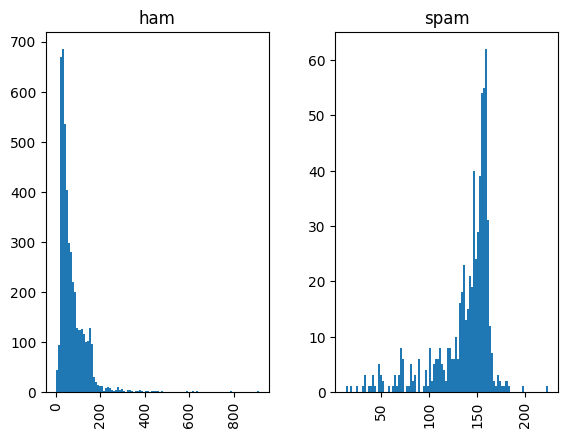

In [11]:
veri.hist(bins=100,column="Karakter Sayısı",by="etiket")
plt.show()

In [12]:
veri["etiket"]=veri["etiket"].map({"ham":0,"spam":1})
veri.head()

,etiket,sms,Karakter Sayısı
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
mesaj=re.sub("[^a-zA-Z]"," ",veri["sms"][0]) ## a-z arası harfleri koru, diğerlerini boş bırak
print(mesaj)
print(veri["sms"][0])

Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [14]:
def harfler(cumle):
    yer=re.compile("[^a-zA-Z]")
    return re.sub(yer," ",cumle)

In [15]:
harfler("aadsad 44 77 ,,,ad  ")

'aadsad          ad  '

In [16]:
harfler(veri["sms"][0])

'Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   '

In [17]:
durdurma=stopwords.words("english")
print(durdurma)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
spam=[]
ham=[]
tum_cumleler=[]
for i in range(len(veri["sms"])):
    r1=veri["sms"].values[i]
    r2=veri["etiket"].values[i]
    

    temiz_cumle=[]
    cumleler=harfler(r1)
    cumleler=cumleler.lower()

    for kelimeler in cumleler.split():
        temiz_cumle.append(kelimeler)

        if r2==1:
            spam.append(cumleler)

        else:
            ham.append(cumleler)

    tum_cumleler.append(" ".join(temiz_cumle))

veri["yeni_sms"]=tum_cumleler
veri.head()

,etiket,sms,Karakter Sayısı,yeni_sms
0,0,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...


In [19]:
veri.values[1]

array([0, 'Ok lar... Joking wif u oni...', 29, 'ok lar joking wif u oni'],
      dtype=object)

In [20]:
# Mesajları temizleme ve küçük harfe çevirme
veri["yeni_sms"] = veri["sms"].apply(lambda x: harfler(x).lower())

# Spam ve ham listelerini ayırma
spam = veri.loc[veri["etiket"]==1, "yeni_sms"].tolist()
ham  = veri.loc[veri["etiket"]==0, "yeni_sms"].tolist()


In [21]:
veri.head()

,etiket,sms,Karakter Sayısı,yeni_sms
0,0,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives aro...


In [22]:
veri.drop(columns=["sms","Karakter Sayısı"],axis=1,inplace=True)
veri.head()


,etiket,yeni_sms
0,0,go until jurong point crazy available only ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i don t think he goes to usf he lives aro...


In [23]:
cv=CountVectorizer()
vektör=cv.fit_transform(veri["yeni_sms"])
vektör.toarray()
print(vektör)

  (0, 2659)	1
  (0, 7064)	1
  (0, 3439)	1
  (0, 4968)	1
  (0, 1443)	1
  (0, 463)	1
  (0, 4598)	1
  (0, 3185)	1
  (0, 886)	1
  (0, 2739)	1
  (0, 7508)	1
  (0, 3560)	1
  (0, 884)	1
  (0, 1171)	1
  (0, 6683)	1
  (0, 2700)	1
  (0, 226)	1
  (0, 7287)	1
  (1, 4565)	1
  (1, 3593)	1
  (1, 3407)	1
  (1, 7410)	1
  (1, 4594)	1
  (2, 3185)	1
  (2, 2470)	1
  :	:
  (5167, 3313)	1
  (5167, 7332)	1
  (5167, 241)	1
  (5167, 3699)	1
  (5167, 6090)	1
  (5167, 2421)	1
  (5167, 6666)	1
  (5167, 589)	1
  (5167, 4402)	1
  (5167, 1706)	1
  (5167, 7097)	1
  (5167, 912)	1
  (5167, 6099)	1
  (5167, 2004)	1
  (5167, 2580)	1
  (5167, 920)	1
  (5167, 2793)	1
  (5167, 3258)	1
  (5167, 61)	1
  (5167, 697)	1
  (5168, 6798)	1
  (5168, 4316)	1
  (5168, 3320)	2
  (5168, 6926)	1
  (5168, 5557)	1


In [24]:
y=veri["etiket"]
x=vektör

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
model=MultinomialNB()
model.fit(x_train,y_train)
tahmin=model.predict(x_test)

In [26]:
acs=accuracy_score(y_test,tahmin)
print(acs*100)

97.87234042553192
